Enter a pollutant (O3, CO, SO2, NO2) or type EXIT to quit:CO
Highest or Lowest AQI? Highest
----------------------------------------------------------------------
Highest Recorded AQI for CO

Date: 2000-12-20 00:00:00
State: California
County: Imperial
City: Calexico
CO AQI: 201.0
CO AQI Category: Very Unhealthy
----------------------------------------------------------------------
Yearly AQI Trend for CO
------------------------------------------------------
Average AQI in 2000: 9.85
Average AQI in 2023: 3.53
CO AQI has decreased by 64.12% from 2000 to 2023
------------------------------------------------------
First Recorded CO AQI: 25.0
Last Recorded CO AQI: 2.0
----------------------------------------------------------------------
First Recorded CO Date: 2000-01-01
Last Recorded CO Date: 2023-09-30
----------------------------------------------------------------------
Mean difference for CO is: 7.95
Ratio of last AQI and first AQI for CO is: 0.08
Days between first and last recorde

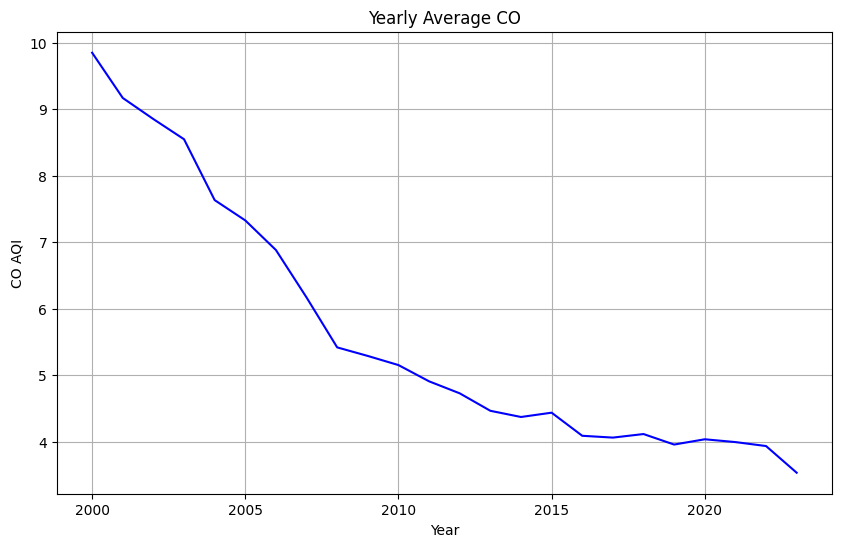

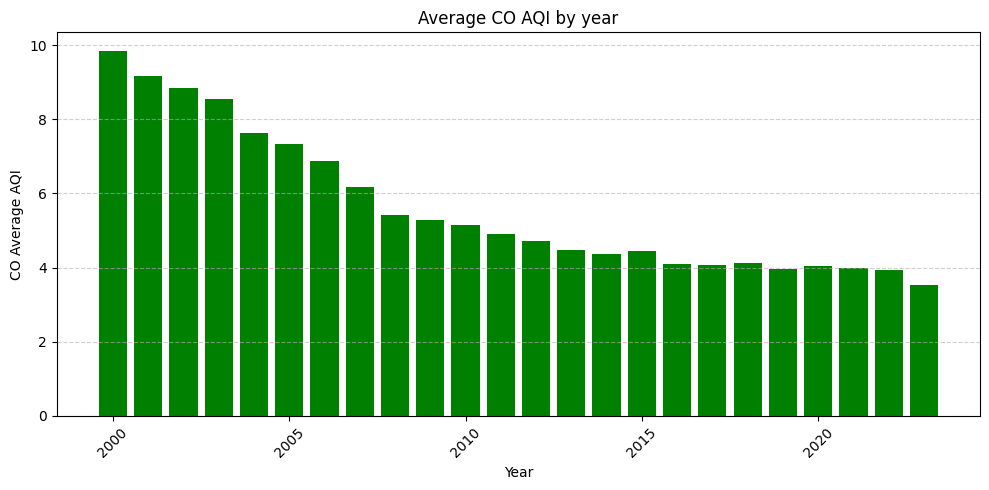

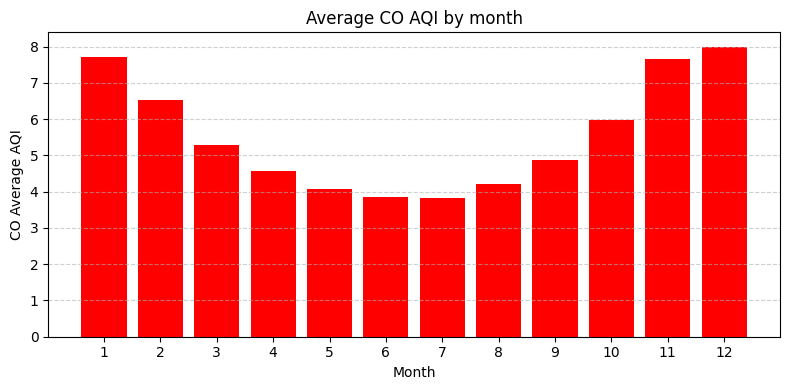

----------------------------------------------------------------------


KeyboardInterrupt: Interrupted by user

In [5]:
########################
#Author: Lucas Banuelos
#Input: Pollutant, Highest or Lowest AQI value
#Output: Recorded AQI of that polluant, percentage increase, mean difference, yearly trend, first recorded date and last recorded date, time in between dates, 3 graphs
#Date: May 3rd 2025
#Instructor: Wengrove
#Dataset: U.S. Pollution from 2000-2023
#Purpose: Present pollution trends and percentages, in order to view the impact that pollution has on our country
########################

import pandas as pd                           #importing the tools for my program
import numpy as np                            #importing the tools for my program
import matplotlib.pyplot as plt               #importing the tools for my program
import my_library_functions
from my_library_functions import classify_aqi
from my_library_functions import print_yearly_aqi_trend #importing the tools for my program

filepath = '/content/pollution_2000_2023.csv' #path to csv file

dataset = pd.read_csv(filepath) #reads csv file as dataset

dataset['Date'] = pd.to_datetime(dataset['Date'])

######################################################################################

date = dataset['Date'] #defining the many columns in the dataset

state = dataset['State'] #defining the many columns in the dataset

county = dataset['County'] #defining the many columns in the dataset

city = dataset['City'] #defining the many columns in the dataset

O3_Mean = dataset['O3 Mean'] #defining the many columns in the dataset

CO_Mean = dataset['CO Mean'] #defining the many columns in the dataset

SO2_Mean = dataset['SO2 Mean'] #defining the many columns in the dataset

NO2_Mean = dataset['NO2 Mean'] #defining the many columns in the dataset

O3_1st_Max_Value = dataset['O3 1st Max Value'] #defining the many columns in the dataset

CO_1st_Max_Value = dataset['CO 1st Max Value'] #defining the many columns in the dataset

SO2_1st_Max_Value = dataset['SO2 1st Max Value'] #defining the many columns in the dataset

NO2_1st_Max_Value = dataset['NO2 1st Max Value'] #defining the many columns in the dataset

O3_1st_Max_Hour = dataset['O3 1st Max Hour'] #defining the many columns in the dataset

CO_1st_Max_Hour = dataset['CO 1st Max Hour'] #defining the many columns in the dataset

SO2_1st_Max_Hour = dataset['SO2 1st Max Hour'] #defining the many columns in the dataset

NO2_1st_Max_Hour = dataset['NO2 1st Max Hour'] #defining the many columns in the dataset

O3_AQI = dataset['O3 AQI'] #defining the many columns in the dataset

CO_AQI = dataset['CO AQI'] #defining the many columns in the dataset

SO2_AQI = dataset['SO2 AQI'] #defining the many columns in the dataset

NO2_AQI = dataset['NO2 AQI'] #defining the many columns in the dataset

##########################################################################################

dataset['O3 AQI Category'] = dataset['O3 AQI'].apply(classify_aqi) #calls upon function from library
dataset['CO AQI Category'] = dataset['CO AQI'].apply(classify_aqi) #calls upon function from library
dataset['SO2 AQI Category'] = dataset['SO2 AQI'].apply(classify_aqi) #calls upon function from library
dataset['NO2 AQI Category'] = dataset['NO2 AQI'].apply(classify_aqi) #calls upon function from library

###########################################################################################


for pollutant in ['O3', 'CO', 'SO2', 'NO2']:
    dataset[f'{pollutant} AQI Category'] = dataset[f'{pollutant} AQI'].apply(classify_aqi) #calls upon function from library

###########################################################################################

def plot_yearly_trend(dataset, pollutant):
  df = dataset[dataset[f'{pollutant} AQI'] > 0].copy()
  df['Year'] = df['Date'].dt.year
  yearly_avg = df.groupby('Year')[f'{pollutant} AQI'].mean()

  plt.figure(figsize=(10, 6))
  plt.plot(yearly_avg.index, yearly_avg.values, linestyle='-', color = 'blue')
  plt.title(f'Yearly Average {pollutant}')
  plt.ylabel(f'{pollutant} AQI')
  plt.xlabel('Year')
  plt.grid(True)
  plt.show()

def plot_avg_aqi_year(dataset, pollutant):
  df = dataset[dataset[f'{pollutant} AQI'] > 0].copy()
  df['Year'] = df['Date'].dt.year
  yearly_avg = df.groupby('Year')[f'{pollutant} AQI'].mean()

  plt.figure(figsize=(10, 5))
  plt.bar(yearly_avg.index, yearly_avg.values, color ='green')
  plt.title(f'Average {pollutant} AQI by year')
  plt.xlabel('Year')
  plt.ylabel(f'{pollutant} Average AQI')
  plt.xticks(rotation = 45)
  plt.grid(axis='y', linestyle ='--', alpha = 0.6)
  plt.tight_layout()
  plt.show()

def plot_avg_aqi_month(dataset, pollutant):
  df = dataset[dataset[f'{pollutant} AQI'] > 0].copy()
  df['Month'] = df['Date'].dt.month
  monthly_avg = df.groupby('Month')[f'{pollutant} AQI'].mean()

  plt.figure(figsize=(8, 4))
  plt.bar(monthly_avg.index, monthly_avg.values, color = 'red')
  plt.title(f'Average {pollutant} AQI by month')
  plt.xlabel('Month')
  plt.ylabel(f'{pollutant} Average AQI')
  plt.xticks(range(1, 13))
  plt.grid(axis='y', linestyle ='--', alpha = 0.6)
  plt.tight_layout()
  plt.show()

###########################################################################################

# User input function for highest recorded AQI as well as its location and time it was recorded
while True:
    pollutant = input("Enter a pollutant (O3, CO, SO2, NO2) or type EXIT to quit:").upper() #user input for pollutant
    if pollutant == 'EXIT': # for terminating program
      print("Program terminated")
      break


    if pollutant not in ['O3', 'CO', 'SO2', 'NO2']:
      print("Invalid input") # for invalid input / error checking


    record_type = input("Highest or Lowest AQI? ").lower() #user input for highest or lowest AQI

    if record_type == 'highest':
      sorted_dataset = dataset.sort_values (by=f'{pollutant} AQI', ascending=False) #sorts dataset
      record = sorted_dataset.iloc[0] # finds the highest for selected pollutant

    elif record_type == 'lowest':
      sorted_dataset = dataset[dataset[f'{pollutant} AQI'] > 0].sort_values(by=f'{pollutant} AQI') #sorts dataset
      record = sorted_dataset.iloc[0] # finds the lowest for selected pollutant
      print("Note: 'Lowest' value is filtered in the dataset here by being none zero")
    else:
      print("Invalid input") # for invalid input / error checking
      continue

    print("----------------------------------------------------------------------") #print statement text box
    print(f"{record_type.capitalize()} Recorded AQI for {pollutant}")
    print()
    print(f"Date: {record['Date']}")
    print(f"State: {record['State']}")
    print(f"County: {record['County']}")
    print(f"City: {record['City']}")
    print(f"{pollutant} AQI: {record[f'{pollutant} AQI']}")
    print(f"{pollutant} AQI Category: {record[f'{pollutant} AQI Category']}")
    print("----------------------------------------------------------------------")

###########################################################################################

    print_yearly_aqi_trend(dataset,pollutant) # calling upon second function in library

###########################################################################################
    nonzero_dataset = dataset[dataset[f'{pollutant} AQI'] > 0].copy()  #filters dataset by leaving out 0
    nonzero_dataset = nonzero_dataset.sort_values(by='Date') # sorting dataset now by date

    first_aqi = nonzero_dataset[f'{pollutant} AQI'].iloc[0]  #grabs the first aqi recorded
    last_aqi = nonzero_dataset[f'{pollutant} AQI'].iloc[-1]  #grabs the last aqi recorded

    first_date = nonzero_dataset['Date'].iloc[0].date()      #grabs the date of the first aqi
    last_date = nonzero_dataset['Date'].iloc[-1].date()      #grabs the date of the last aqi

    print(f"First Recorded {pollutant} AQI: {first_aqi}")    #print statements
    print(f"Last Recorded {pollutant} AQI: {last_aqi}")
    print("----------------------------------------------------------------------")
    print(f"First Recorded {pollutant} Date: {first_date}")
    print(f"Last Recorded {pollutant} Date: {last_date}")
    print("----------------------------------------------------------------------")
###########################################################################################

    mean_diff = dataset[f'{pollutant} Mean'].max() - dataset[f'{pollutant} Mean'].min() # gets the differences of mean by subtracting max and min
    print("Mean difference for",pollutant,"is:",round(mean_diff, 2)) #print statement with rounding

    ratio_aqi = last_aqi / first_aqi if first_aqi > 0 else np.nan # ratio of aqi value by dividing
    print("Ratio of last AQI and first AQI for",pollutant,"is:",round(ratio_aqi, 2)) #print statement with rounding

    days_between = (last_date - first_date).days # calcualates the days inbetween then years
    years_between = days_between // 365
    print("Days between first and last recorded AQI for",pollutant,"is:",days_between)
    print("Years between first and last recorded AQI for",pollutant,"is:",years_between)
    print("----------------------------------------------------------------------")

###########################################################################################
    plot_yearly_trend(dataset, pollutant) # Now calling upon my plots I defined before the while loop
    plot_avg_aqi_year(dataset, pollutant)
    plot_avg_aqi_month(dataset, pollutant)
    print("----------------------------------------------------------------------")
###########################################################################################

